In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_json('./AMD.json')
plt.style.use('fivethirtyeight')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

/Users/senhmo/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


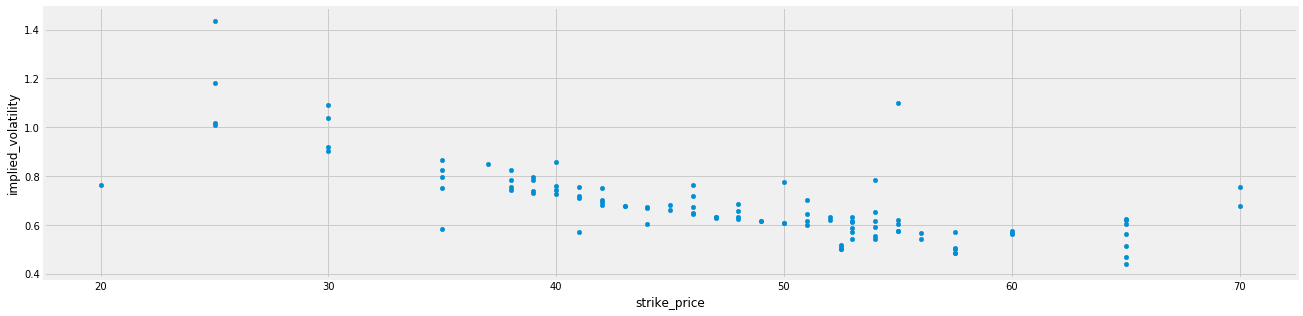

In [2]:
df.plot.scatter('strike_price', 'implied_volatility', figsize=(20,5))

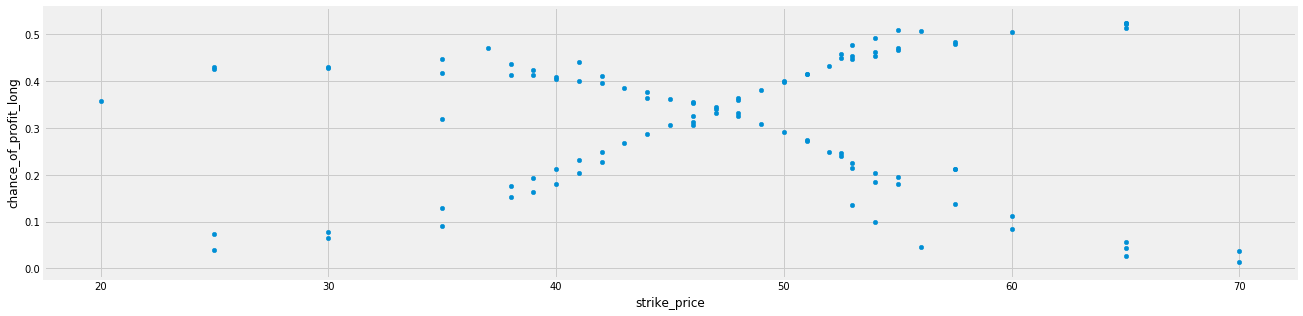

In [3]:
df.plot.scatter('strike_price', 'chance_of_profit_long', figsize=(20,5))

In [4]:
df['product'] = df.apply(lambda row: (row['chance_of_profit_short']/row['implied_volatility']), axis=1)

In [5]:
dfcall = df[df['type'] == 'call']
chance_profit = dfcall['chance_of_profit_long'].describe()['75%']

In [6]:
chance_profit_low_iv = dfcall[dfcall['chance_of_profit_long'] > chance_profit]['implied_volatility'].describe()['25%']

In [7]:
max_profit = dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv)]['adjusted_mark_price'].max()

In [8]:
dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv) & (dfcall['adjusted_mark_price'] == max_profit)]

,adjusted_mark_price,ask_price,ask_size,bid_price,bid_size,break_even_price,high_price,instrument,last_trade_price,last_trade_size,...,issue_date,min_ticks,rhs_tradability,state,strike_price,tradability,type,updated_at,url,product
12,11.33,13.45,72,9.2,62,49.33,NaN,https://api.robinhood.com/options/instruments/...,8.2,2.0,...,1987-01-12,"{'above_tick': '0.05', 'below_tick': '0.01', '...",untradable,active,38.0,tradable,call,2020-04-02 01:10:30.279027+00:00,https://api.robinhood.com/options/instruments/...,0.759334


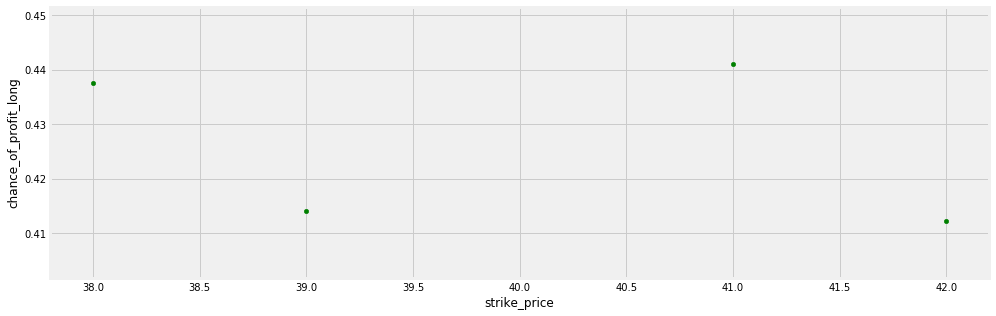

In [9]:

dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv)].plot.scatter('strike_price', 'chance_of_profit_long', figsize=(15,5), c='green')

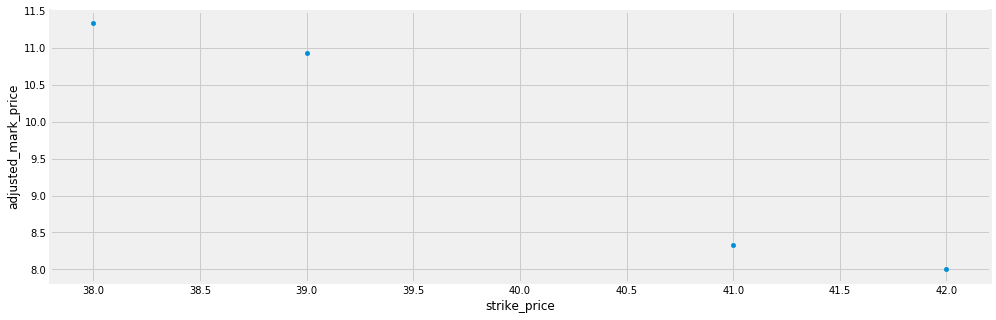

In [10]:
dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv)].plot.scatter('strike_price', 'adjusted_mark_price', figsize=(15,5))

In [11]:
dfcall[(dfcall['strike_price'] > 37) & (dfcall['strike_price'] < 42)][['adjusted_mark_price', 'strike_price', 'expiration_date', 'volume', 'chance_of_profit_long', 'implied_volatility']].sort_values('chance_of_profit_long', ascending=False).head(10)

,adjusted_mark_price,strike_price,expiration_date,volume,chance_of_profit_long,implied_volatility
97,8.33,41.0,2020-05-08,0,0.441052,0.569717
12,11.33,38.0,2020-05-08,0,0.437449,0.740848
21,10.65,39.0,2020-05-08,5,0.424601,0.796159
41,10.93,39.0,2020-05-22,0,0.414068,0.729026
43,11.93,38.0,2020-05-22,0,0.412805,0.784707
77,10.08,40.0,2020-05-08,0,0.409591,0.858861
27,10.23,40.0,2020-05-22,0,0.404767,0.742528
26,9.35,41.0,2020-05-22,2,0.401218,0.710228
